# Ascenso a la colina

Optimización de la función de rastrigin:

- 20 dimensiones
- Un millón de iteraciones.
- 30 experimentos (corridas)

Se definió el tamaño la desviación estándar $\sigma = 2 $

Procedimiento: 

1. Se inicializa aleatoriamente con distribución uniforme el individuo.
2. Siguiente paso:
    1. Se generan números aleatorios por cada dimensión, con una distribución normal, con media de cero y desviación estándar $\sigma$.
    2. Se suman esos valores aleatorios a las dimensiones del agente.
    3. Si la nueva posición tiene un mejor fitness que el punto inicial, se determina como las nuevas corrdenadas. 
3. Iterar

In [2]:
import numpy as np
import pandas as pd
import random
import math
import csv
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

from multiprocessing import Pool

import time
import copy

In [3]:
n_dims=20
cant_indiv=1
iteraciones=1000000
iter_experimentos=30
sigma=2
n_reports=20
distrib="gauss"#"unif"
min_factible=-5.12 
max_factible=5.12

In [4]:
def rastrigin(X_array, A=10, m=0):
    n=len(X_array)
    y=A*n+(sum([(x_val**2)-(A*math.cos(2*math.pi*x_val))for x_val in X_array]))
    return y

In [5]:
# Generar un vector de n_dims dimensiones entre los valores factibles.
def rand_vec():
    X_array=[random.uniform(min_factible,max_factible) for i in range(n_dims)]
    return np.array(X_array)

In [6]:
def delta_unif_rand(n_dims=10):
    return np.array([random.random()*2-1 for dim in range(n_dims)])

def delta_gauss_rand(n_dims=10, sigma=1):
    return np.array([random.gauss(0, sigma) for dim in range(n_dims)])

In [7]:
def ascenso_colina_1_step (X_arr):
    if distrib=="unif":
        deltas=delta_unif_rand(n_dims)*sigma
    if distrib=="gauss":
        deltas=delta_gauss_rand(n_dims, sigma)
    X_arr_2=X_arr+deltas
    for i_dim in range(n_dims):
        if X_arr_2[i_dim]>=max_factible:
            X_arr_2[i_dim]=max_factible
        if X_arr_2[i_dim]<=min_factible:
            X_arr_2[i_dim]=min_factible
    ras_X_arr=rastrigin(X_arr)
    ras_X_arr_2=rastrigin(X_arr_2)
    if ras_X_arr_2<ras_X_arr:
        return X_arr_2
    else:
        return X_arr

def ascenso_colina (X_arr):
    # calcula el ascenso a la colina n_iteraciones, devolviendo el fitness cada 100 iter
    paso=copy.copy(X_arr)
    #cordins=[paso]
    fit_steps=[rastrigin(paso)]
    for ith_iter in xrange(iteraciones):
        paso=ascenso_colina_1_step(paso)
        if (ith_iter+1)%100==0:# Los archivos de todos los fitness es muy pesado.
            fit_step=rastrigin(paso)
            fit_steps.append(fit_step)
    return [paso,fit_steps]

In [19]:
coords_best_bloque=[]
fitness_bloque=[]
fit_gral=[]
prim_gen=[rand_vec() for ind in xrange(iter_experimentos)]
for bloque in range(10):
    '''
    Crear n_corridas de poblaciones
    iterar sobre cada población calculando el fitness del mejor y dejándolo avanzar tantas iteraciones como pueda.
    '''

    #'''
    hil_clim_start_time=time.time()
    #best_nCorrds_mIters=[[rastrigin(prim)for prim in prim_gen]]# indiv, fitness en cada corrida
    #best_nCorrds_mIters_bit=[prim_gen]#Registra el array de coordenadas para cada individuo de la corrida
    if __name__ == '__main__':
        pool = Pool()
        corridas=pool.map(ascenso_colina,prim_gen)
        pool.close() 
        pool.join()

    coord_final=[corrida[0] for corrida in corridas]
    prim_gen=coord_final
    fitness_iter=[corrida[1] for corrida in corridas]
    coords_best_bloque.append(coord_final)
    fitness_bloque.append(fitness_iter)
    np.savetxt(''.join(["Results_1/hill_climb_",str(bloque),".csv"]),np.array(fitness_iter).T)
    # with open("Results_1/hill_climb_best_bit.csv", 'wb') as f:
    #     writer = csv.writer(f)
    #     [writer.writerow([best_bit])for best_bit in coord_final]

    hil_clim_end_time=time.time()
    hil_clim_exec_time=hil_clim_end_time-hil_clim_start_time
    print "###_________ EXEC TIME:",str(hil_clim_exec_time), "| bloque:",bloque


###_________ EXEC TIME: 347.397888184 | bloque: 0
###_________ EXEC TIME: 348.884104013 | bloque: 1
###_________ EXEC TIME: 350.593609095 | bloque: 2
###_________ EXEC TIME: 349.087662935 | bloque: 3
###_________ EXEC TIME: 345.398020029 | bloque: 4
###_________ EXEC TIME: 357.12826395 | bloque: 5
###_________ EXEC TIME: 356.512476921 | bloque: 6
###_________ EXEC TIME: 361.671275139 | bloque: 7
###_________ EXEC TIME: 360.982453823 | bloque: 8
###_________ EXEC TIME: 341.295638084 | bloque: 9


In [20]:
#loads=np.array([np.loadtxt("Results_1/hill_climb_"+str(bloque)+".csv") for bloque in range(10)])
data=np.array([[num for bloq in fitness_bloque for num in bloq[corrida]]for corrida in range(iter_experimentos)]).T
best=[]
worst=[]
mean=[]
median=[]
std_median=[]

for iterac in data:
    best.append(min(iterac))
    worst.append(max(iterac))
    mean.append(np.mean(iterac))
    median.append(np.median(iterac))
    std_median.append(np.sqrt(sum([(fit-np.median(iterac))**2 for fit in iterac])/len(iterac)))

In [34]:
best=[best[i] for i in range (100000)]
worst=[worst[i] for i in range (100000)]
mean=[mean[i] for i in range (100000)]
median=[median[i] for i in range (100000)]
std_median=[std_median[i] for i in range (100000)]

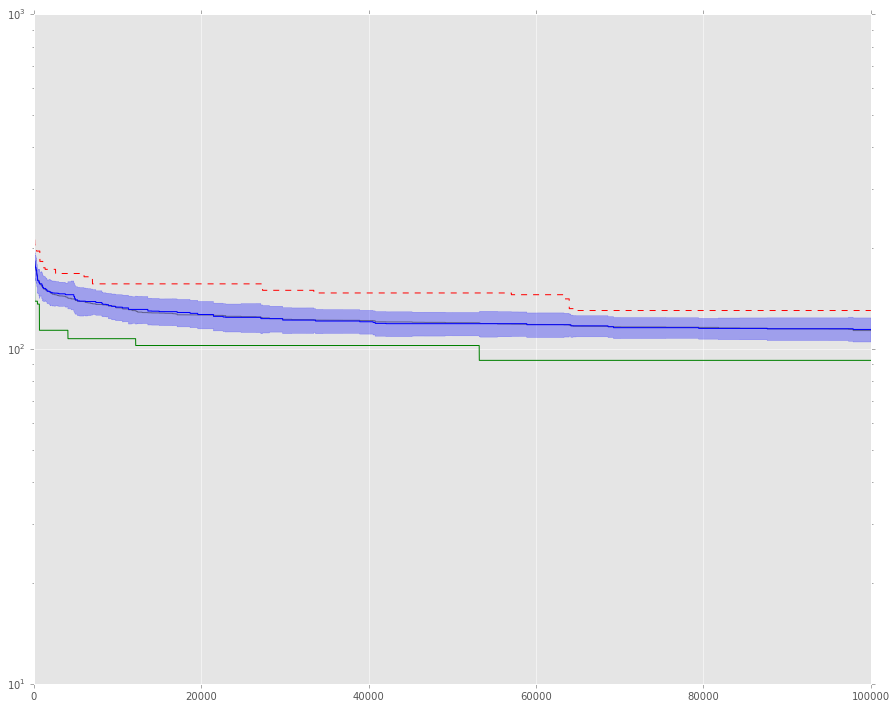

In [35]:
plt.figure(figsize=(15,12))
plt.plot(best, "g")
plt.plot(worst, "r--")
plt.plot(mean, "k", alpha=0.4)
plt.plot(median,"b")
plt.fill_between(xrange(len(np.array(median))),
                 np.array(median)+np.array(std_median),
                 np.array(median)-np.array(std_median),
                 alpha=0.3,
                 color="b")
plt.yscale("log")
#plt.savefig("hill_climb.pdf")
plt.show()

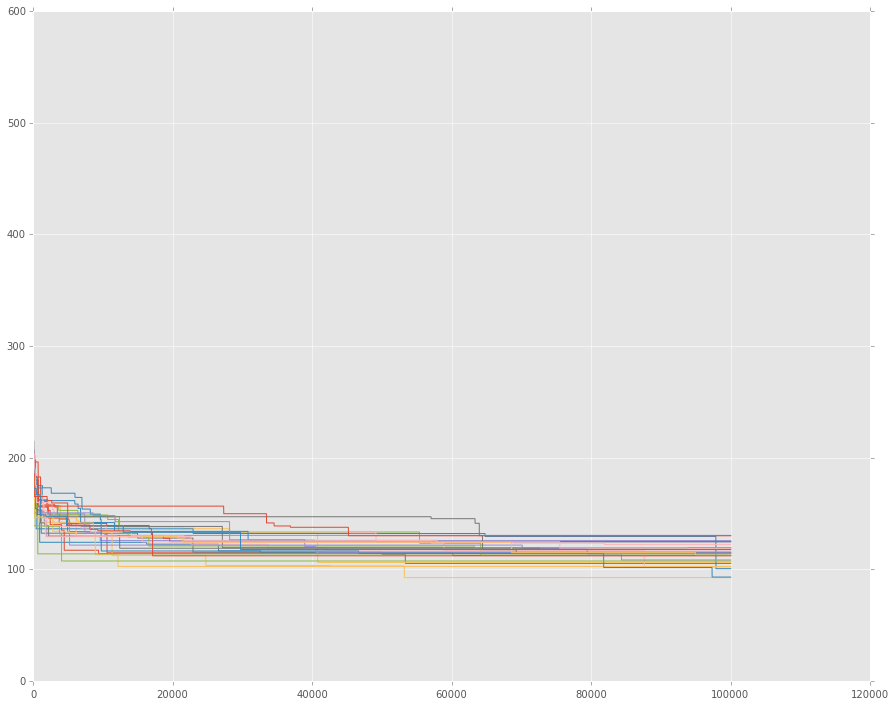

In [36]:
plt.figure(figsize=(15,12))
[plt.plot(dat) for dat in data.T]
plt.show()

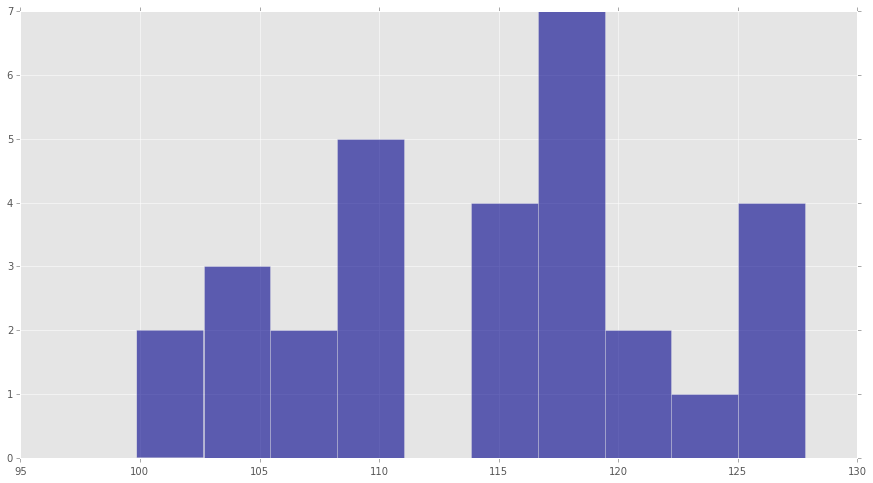

In [143]:
plt.figure(figsize=(15,8))
plt.hist(data[-1,:],color="darkblue", alpha=.6)
plt.show()

In [144]:
print data[-1]
min(data[-1])

[ 119.19688949  103.7790037   118.63196665  110.15409713  109.71375241
  116.9832718   118.33228568  113.86302816  127.14747391  107.4486428
  124.39045691  105.88285809  105.41384901   99.86027304  110.09141126
  127.80843576  101.21972437  126.843976    103.47552064  109.37128451
  118.93128965  118.66579773  122.14815512  114.13748872  119.77889242
  119.22116642  115.65422516  114.23650295  109.67929796  125.26640822]


99.860273043680053

In [145]:
coord_final[data[-1].argmin()]

array([-0.10991442, -0.64487508, -1.08084255, -0.93050956, -0.09484561,
       -0.27506696, -1.07816552,  1.99149364, -1.95860088, -0.8873617 ,
        1.81636141, -0.96442158, -0.06035588, -0.93286475,  0.97223452,
       -1.89970932, -1.22006951,  0.83902638, -2.08307256,  2.93154807])